# BaggingClassifier

Pada bagian ini, kita akan melakukan perbandingan performa algoritma **BaggingClassifier** sebelum dan sesudah penerapan SMOTE:

## **Tujuan**:
1. **Mengukur performa** klasifikasi pada data yang tidak seimbang (original)
2. **Mengukur performa** klasifikasi pada data yang sudah diseimbangkan dengan SMOTE
3. **Membandingkan akurasi** dan metrik evaluasi lainnya (precision, recall, F1-score)
4. **Menganalisis dampak SMOTE** terhadap performa model ensemble

## **Metodologi**:
- Menggunakan **train-test split** yang konsisten untuk perbandingan yang fair
- Mengevaluasi dengan **multiple metrics**: Accuracy, Precision, Recall, F1-Score
- Membuat **confusion matrix** untuk analisis detail
- Visualisasi perbandingan hasil
- Menggunakan **Decision Tree sebagai base estimator** dengan ensemble method

C:\Users\ideapad\AppData\Local\Temp\ipykernel_21488\584279652.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM psd.Iris", conn)



Isi tabel iris:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     36              5             3              1             0   
1     37              6             4              1             0   
2     38              5             3              2             0   
3     39              4             3              1             0   
4     40              5             3              2             0   
..   ...            ...           ...            ...           ...   
110  146              7             3              5             2   
111  147              6             3              5             2   
112  148              7             3              5             2   
113  149              6             3              5             2   
114  150              6             3              5             2   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..        

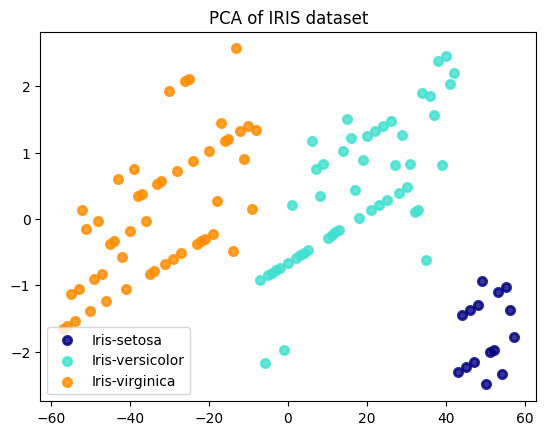

Distribusi kelas sebelum SMOTE:
Counter({'Iris-versicolor': 50, 'Iris-virginica': 50, 'Iris-setosa': 15})
Total sampel sebelum SMOTE: 115
Jumlah fitur: 5
Distribusi kelas setelah SMOTE:
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
Total sampel setelah SMOTE: 150

Contoh data sintetis yang dihasilkan SMOTE:
     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
140  48              5             3              1             0  Iris-setosa
141  37              5             3              1             0  Iris-setosa
142  37              5             3              1             0  Iris-setosa
143  48              5             3              1             0  Iris-setosa
144  46              5             3              1             0  Iris-setosa
145  36              5             3              1             0  Iris-setosa
146  41              5             3              1             0  Iris-setosa
147  47              5         

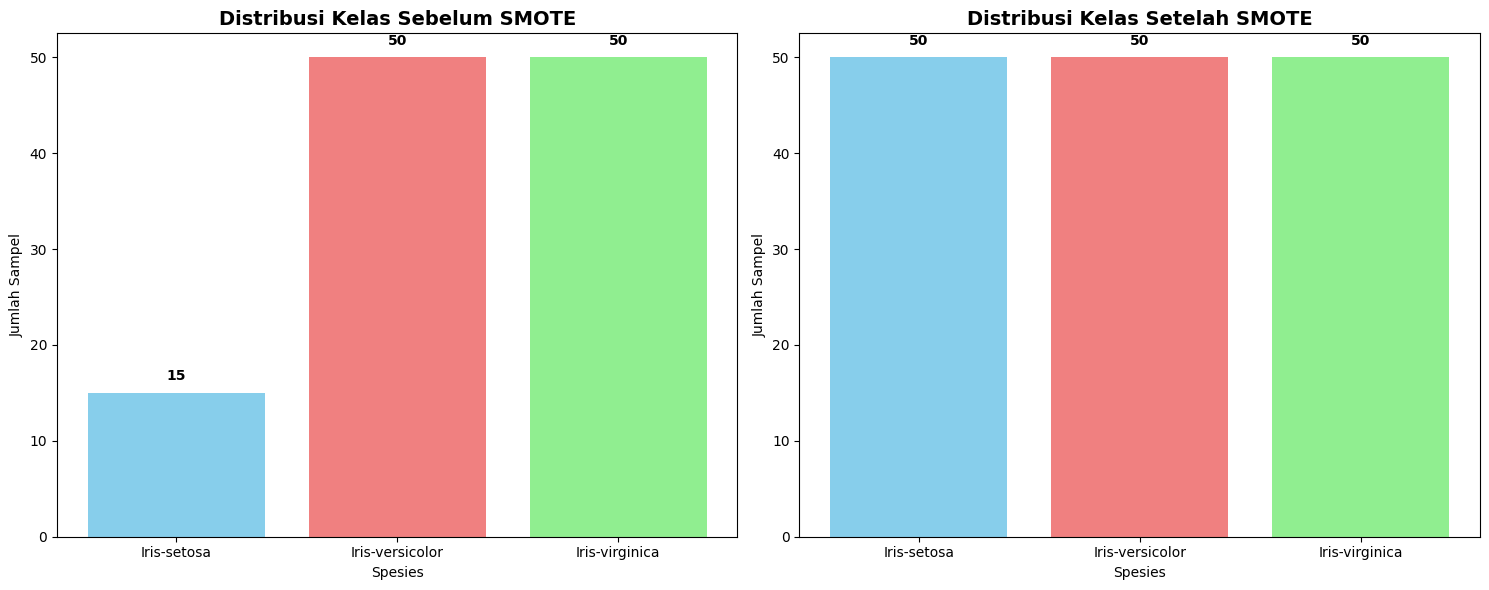


Tabel Perbandingan:
           Spesies  Sebelum SMOTE  Setelah SMOTE  Sampel Sintetis Ditambahkan
0      Iris-setosa             15             50                           35
1  Iris-versicolor             50             50                            0
2   Iris-virginica             50             50                            0
VISUALISASI PCA DATA SETELAH SMOTE


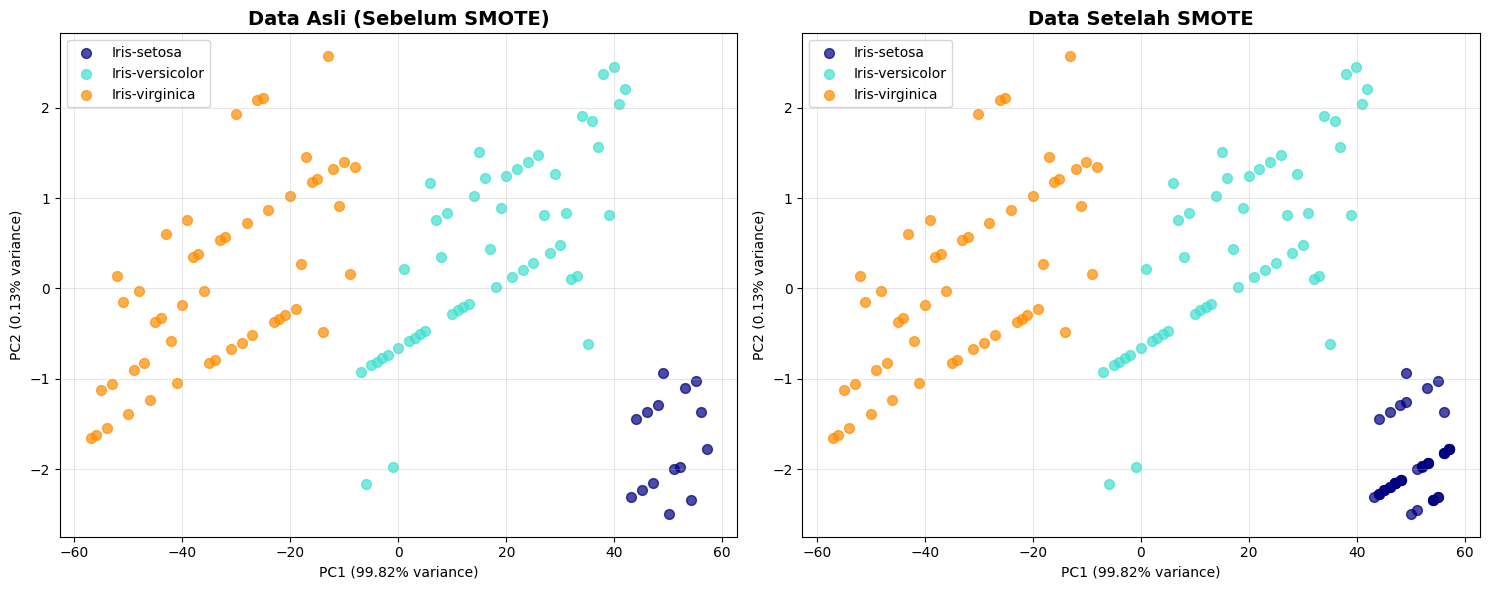

RINGKASAN HASIL SMOTE
• Data asli: 115 sampel dengan ketidakseimbangan kelas
• Data setelah SMOTE: 150 sampel dengan kelas yang seimbang
• Sampel sintetis yang dihasilkan: 35 sampel
• Semua kelas sekarang memiliki 50 sampel


In [1]:
%run overSampling.ipynb

## Persiapan Data untuk Klasifikasi

**Langkah-langkah**:
1. **Import libraries** yang diperlukan untuk BaggingClassifier dan evaluasi
2. **Menyiapkan train-test split** untuk data original dan data SMOTE
3. **Menggunakan stratified sampling** untuk mempertahankan proporsi kelas
4. **Konsistensi random_state** untuk reproducibility hasil

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import seaborn as sns
from collections import Counter

print("PERSIAPAN DATA UNTUK KLASIFIKASI BAGGING CLASSIFIER")

RANDOM_STATE = 42

# 1. Persiapkan data original (sebelum SMOTE)
print("\n1. Data Original (Sebelum SMOTE):")
X_original = df.drop('Species', axis=1)
y_original = df['Species']

print(f"   - Jumlah sampel: {len(X_original)}")
print(f"   - Jumlah fitur: {X_original.shape[1]}")
print(f"   - Distribusi kelas: {dict(Counter(y_original))}")

# Train-test split untuk data original
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.3, random_state=RANDOM_STATE, 
    stratify=y_original
)

print(f"   - Training set: {X_train_orig.shape[0]} sampel")
print(f"   - Test set: {X_test_orig.shape[0]} sampel")

# 2. Persiapkan data setelah SMOTE
print("\n2. Data Setelah SMOTE:")
print(f"   - Jumlah sampel: {len(X_resampled)}")
print(f"   - Jumlah fitur: {X_resampled.shape[1]}")
print(f"   - Distribusi kelas: {dict(Counter(y_resampled))}")

# Train-test split untuk data SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=RANDOM_STATE, 
    stratify=y_resampled
)

print(f"   - Training set: {X_train_smote.shape[0]} sampel")
print(f"   - Test set: {X_test_smote.shape[0]} sampel")

PERSIAPAN DATA UNTUK KLASIFIKASI BAGGING CLASSIFIER

1. Data Original (Sebelum SMOTE):
   - Jumlah sampel: 115
   - Jumlah fitur: 5
   - Distribusi kelas: {'Iris-setosa': 15, 'Iris-versicolor': 50, 'Iris-virginica': 50}


NameError: name 'train_test_split' is not defined

## Klasifikasi BaggingClassifier pada Data Original

**Implementasi BaggingClassifier** pada dataset Iris yang **belum diseimbangkan**:

### **Parameter Model**:
- **Base Estimator**: Decision Tree Classifier (default parameters)
- **n_estimators**: 10 (jumlah base classifiers dalam ensemble)
- **max_samples**: 1.0 (menggunakan semua sampel untuk setiap base classifier)
- **max_features**: 1.0 (menggunakan semua fitur untuk setiap base classifier)
- **Bootstrap**: True (sampling dengan replacement)

### **Keunggulan Bagging**:
- **Reduces overfitting**: Averaging multiple models mengurangi variance
- **Parallel training**: Base classifiers dapat dilatih secara paralel
- **Robust to noise**: Ensemble method lebih tahan terhadap outliers
- **Improved generalization**: Kombinasi multiple weak learners menghasilkan strong learner

### **Evaluasi**:
- **Accuracy**: Proporsi prediksi yang benar
- **Precision**: True Positive / (True Positive + False Positive)  
- **Recall**: True Positive / (True Positive + False Negative)
- **F1-Score**: Harmonic mean dari Precision dan Recall

KLASIFIKASI BAGGING CLASSIFIER PADA DATA ORIGINAL (SEBELUM SMOTE)

HASIL EVALUASI MODEL PADA DATA ORIGINAL:
Accuracy:  1.0000 (100.00%)
Precision: 1.0000 (100.00%)
Recall:    1.0000 (100.00%)
F1-Score:  1.0000 (100.00%)


CLASSIFICATION REPORT DETAIL:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        35
      macro avg       1.00      1.00      1.00        35
   weighted avg       1.00      1.00      1.00        35

CONFUSION MATRIX:


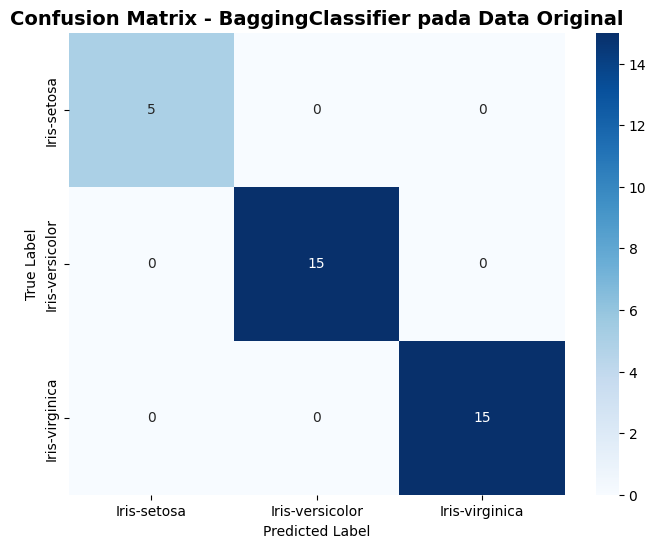


RINGKASAN PERFORMA DATA ORIGINAL:
• Total sampel training: 80
• Total sampel testing: 35
• Jumlah base estimators: 10
• Base estimator: Decision Tree Classifier
• Akurasi: 100.00%
• Model berhasil mengklasifikasikan 35 dari 35 sampel dengan benar


In [ ]:
print("KLASIFIKASI BAGGING CLASSIFIER PADA DATA ORIGINAL (SEBELUM SMOTE)")

# 1. Inisialisasi dan training model BaggingClassifier
# Menggunakan DecisionTree sebagai base estimator
bagging_original = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    n_estimators=10, 
    random_state=0,
    bootstrap=True,
)

bagging_original.fit(X_train_orig, y_train_orig)

# 2. Prediksi pada test set
y_pred_orig = bagging_original.predict(X_test_orig)

# 3. Evaluasi performa
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
precision_orig = precision_score(y_test_orig, y_pred_orig, average="weighted")
recall_orig = recall_score(y_test_orig, y_pred_orig, average="weighted")
f1_orig = f1_score(y_test_orig, y_pred_orig, average="weighted")

print(f"\nHASIL EVALUASI MODEL PADA DATA ORIGINAL:")
print(f"Accuracy:  {accuracy_orig:.4f} ({accuracy_orig*100:.2f}%)")
print(f"Precision: {precision_orig:.4f} ({precision_orig*100:.2f}%)")
print(f"Recall:    {recall_orig:.4f} ({recall_orig*100:.2f}%)")
print(f"F1-Score:  {f1_orig:.4f} ({f1_orig*100:.2f}%)")

print(f"\n\nCLASSIFICATION REPORT DETAIL:")
print(classification_report(y_test_orig, y_pred_orig))

# 4. Confusion Matrix
print("CONFUSION MATRIX:")
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_orig,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=bagging_original.classes_,
    yticklabels=bagging_original.classes_,
)
plt.title(
    "Confusion Matrix - BaggingClassifier pada Data Original",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"\n{'='*70}")
print("RINGKASAN PERFORMA DATA ORIGINAL:")
print(f"• Total sampel training: {len(X_train_orig)}")
print(f"• Total sampel testing: {len(X_test_orig)}")
print(f"• Jumlah base estimators: {bagging_original.n_estimators}")
print(f"• Base estimator: Decision Tree Classifier")
print(f"• Akurasi: {accuracy_orig*100:.2f}%")
print(
    f"• Model berhasil mengklasifikasikan {int(accuracy_orig * len(X_test_orig))} dari {len(X_test_orig)} sampel dengan benar"
)
print("=" * 70)

## Klasifikasi BaggingClassifier pada Data SMOTE

**Implementasi BaggingClassifier** pada dataset Iris yang **sudah diseimbangkan dengan SMOTE**:

### **Keuntungan SMOTE untuk BaggingClassifier**:
1. **Balanced Training**: Semua kelas memiliki representasi yang sama untuk setiap base estimator
2. **Reduced Bias**: Ensemble tidak bias terhadap kelas mayoritas
3. **Better Diversity**: Base estimators dilatih dengan data yang lebih beragam
4. **Improved Minority Class Detection**: Performa lebih baik pada kelas minoritas
5. **Enhanced Bootstrap Sampling**: Sampling lebih representatif dari semua kelas

### **Expected Improvements**:
- Peningkatan recall untuk kelas minoritas
- Performa yang lebih seimbang across all classes
- Better ensemble diversity karena balanced training data
- Potential slight decrease pada overall accuracy (trade-off yang normal)
- Improved robustness karena kombinasi SMOTE + Bagging

KLASIFIKASI BAGGING CLASSIFIER PADA DATA SMOTE (SETELAH SMOTE)

HASIL EVALUASI MODEL PADA DATA SMOTE:
Accuracy:  1.0000 (100.00%)
Precision: 1.0000 (100.00%)
Recall:    1.0000 (100.00%)
F1-Score:  1.0000 (100.00%)


CLASSIFICATION REPORT DETAIL:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

CONFUSION MATRIX:


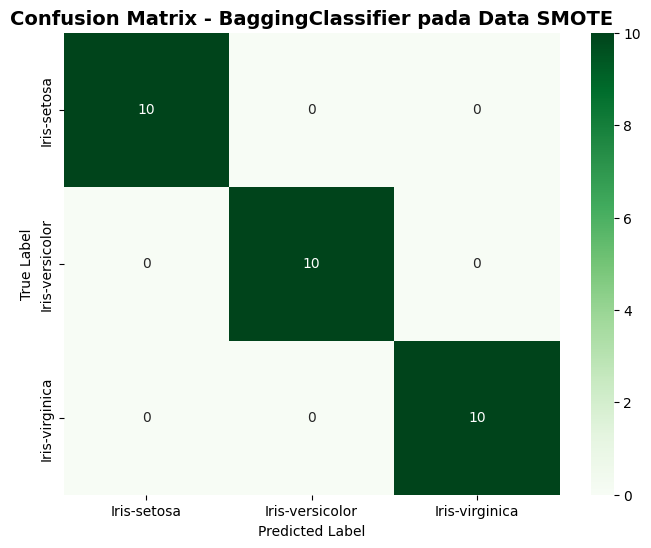


RINGKASAN PERFORMA DATA SMOTE:
• Total sampel training: 120
• Total sampel testing: 30
• Jumlah base estimators: 10
• Base estimator: Decision Tree Classifier
• Akurasi: 100.00%
• Model berhasil mengklasifikasikan 30 dari 30 sampel dengan benar


In [ ]:
print("KLASIFIKASI BAGGING CLASSIFIER PADA DATA SMOTE (SETELAH SMOTE)")

# 1. Inisialisasi dan training model BaggingClassifier pada data SMOTE
bagging_smote = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    n_estimators=10,
    random_state=0,
    bootstrap=True,
)

bagging_smote.fit(X_train_smote, y_train_smote)

# 2. Prediksi pada test set
y_pred_smote = bagging_smote.predict(X_test_smote)

# 3. Evaluasi performa
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
precision_smote = precision_score(y_test_smote, y_pred_smote, average="weighted")
recall_smote = recall_score(y_test_smote, y_pred_smote, average="weighted")
f1_smote = f1_score(y_test_smote, y_pred_smote, average="weighted")

print(f"\nHASIL EVALUASI MODEL PADA DATA SMOTE:")
print(f"Accuracy:  {accuracy_smote:.4f} ({accuracy_smote*100:.2f}%)")
print(f"Precision: {precision_smote:.4f} ({precision_smote*100:.2f}%)")
print(f"Recall:    {recall_smote:.4f} ({recall_smote*100:.2f}%)")
print(f"F1-Score:  {f1_smote:.4f} ({f1_smote*100:.2f}%)")

print(f"\n\nCLASSIFICATION REPORT DETAIL:")
print(classification_report(y_test_smote, y_pred_smote))

# 4. Confusion Matrix
print("CONFUSION MATRIX:")
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_smote,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=bagging_smote.classes_,
    yticklabels=bagging_smote.classes_,
)
plt.title(
    "Confusion Matrix - BaggingClassifier pada Data SMOTE",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"\n{'='*70}")
print("RINGKASAN PERFORMA DATA SMOTE:")
print(f"• Total sampel training: {len(X_train_smote)}")
print(f"• Total sampel testing: {len(X_test_smote)}")
print(f"• Jumlah base estimators: {bagging_smote.n_estimators}")
print(f"• Base estimator: Decision Tree Classifier")
print(f"• Akurasi: {accuracy_smote*100:.2f}%")
print(
    f"• Model berhasil mengklasifikasikan {int(accuracy_smote * len(X_test_smote))} dari {len(X_test_smote)} sampel dengan benar"
)
print("=" * 70)